***This file contains LSTM model***

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, Callback
import tensorflow.keras as keras
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

In [2]:
data = pd.read_csv("./soil_data.csv")
data

,fips,lat,lon,elevation,slope1,slope2,slope3,slope4,slope5,slope6,...,CULTRF_LAND,CULTIR_LAND,CULT_LAND,SQ1,SQ2,SQ3,SQ4,SQ5,SQ6,SQ7
0,1001,32.536382,-86.644490,63,0.0419,0.2788,0.2984,0.2497,0.1142,0.0170,...,56.293411,1.014811,57.308224,1,1,1,1,1,1,2
1,1005,31.870670,-85.405456,146,0.0158,0.1868,0.5441,0.2424,0.0106,0.0003,...,72.578804,1.828159,74.406960,3,2,1,1,1,1,1
2,1003,30.659218,-87.746067,52,0.0746,0.4370,0.4415,0.0469,0.0000,0.0000,...,59.843639,2.996914,62.840553,3,2,1,2,1,1,1
3,1007,33.015893,-87.127148,93,0.0144,0.1617,0.3714,0.3493,0.0898,0.0134,...,1.916593,0.008330,1.924924,3,2,1,1,1,1,1
4,1009,33.977448,-86.567246,198,0.0050,0.0872,0.2799,0.3576,0.1477,0.1037,...,1.891909,0.027488,1.919397,3,2,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3104,56037,41.660339,-108.875676,2085,0.0016,0.0281,0.1763,0.3554,0.2121,0.2097,...,0.000000,0.000000,0.000000,1,1,3,1,1,1,3
3105,56039,44.049321,-110.588102,2564,0.0003,0.0026,0.0166,0.0722,0.1489,0.5005,...,2.922309,0.000000,2.922309,1,1,1,1,1,1,1
3106,56043,43.878831,-107.669052,1417,0.0034,0.0470,0.2331,0.4099,0.2064,0.0999,...,0.000000,0.000000,0.000000,1,1,1,1,1,1,1
3107,56041,41.284726,-110.558947,2327,0.0050,0.2009,0.4063,0.1858,0.0964,0.1031,...,1.013702,10.755590,11.769293,1,1,2,1,1,1,2


In [ ]:
train_data = pd.read_csv("./train_timeseries.csv") #taking only train data
train_data

In [8]:
result = pd.merge(train_data, data, on='fips', how='inner')

In [9]:
result

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,CULTRF_LAND,CULTIR_LAND,CULT_LAND,SQ1,SQ2,SQ3,SQ4,SQ5,SQ6,SQ7
0,1001,2000-01-01,0.22,100.51,9.65,14.74,13.51,13.51,20.96,11.46,...,56.293411,1.014811,57.308224,1,1,1,1,1,1,2
1,1001,2000-01-02,0.20,100.55,10.42,16.69,14.71,14.71,22.80,12.61,...,56.293411,1.014811,57.308224,1,1,1,1,1,1,2
2,1001,2000-01-03,3.65,100.15,11.76,18.49,16.52,16.52,22.73,15.32,...,56.293411,1.014811,57.308224,1,1,1,1,1,1,2
3,1001,2000-01-04,15.95,100.29,6.42,11.40,6.09,6.10,18.09,2.16,...,56.293411,1.014811,57.308224,1,1,1,1,1,1,2
4,1001,2000-01-05,0.00,101.15,2.95,3.86,-3.29,-3.20,10.82,-2.66,...,56.293411,1.014811,57.308224,1,1,1,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19300675,56043,2016-12-27,0.16,82.88,1.63,-7.97,-13.49,-12.81,-1.39,-13.60,...,0.000000,0.000000,0.000000,1,1,1,1,1,1,1
19300676,56043,2016-12-28,0.02,83.33,1.41,-8.71,-14.10,-13.84,-2.49,-13.56,...,0.000000,0.000000,0.000000,1,1,1,1,1,1,1
19300677,56043,2016-12-29,0.00,83.75,1.59,-7.96,-13.30,-13.03,0.42,-14.51,...,0.000000,0.000000,0.000000,1,1,1,1,1,1,1
19300678,56043,2016-12-30,1.22,82.49,2.63,-2.94,-7.40,-7.33,3.76,-6.86,...,0.000000,0.000000,0.000000,1,1,1,1,1,1,1


In [10]:
result.isnull().sum()

fips                    0
date                    0
PRECTOT                 0
PS                      0
QV2M                    0
T2M                     0
T2MDEW                  0
T2MWET                  0
T2M_MAX                 0
T2M_MIN                 0
T2M_RANGE               0
TS                      0
WS10M                   0
WS10M_MAX               0
WS10M_MIN               0
WS10M_RANGE             0
WS50M                   0
WS50M_MAX               0
WS50M_MIN               0
WS50M_RANGE             0
score            16543884
lat                     0
lon                     0
elevation               0
slope1                  0
slope2                  0
slope3                  0
slope4                  0
slope5                  0
slope6                  0
slope7                  0
slope8                  0
aspectN                 0
aspectE                 0
aspectS                 0
aspectW                 0
aspectUnknown           0
WAT_LAND                0
NVG_LAND    

In [11]:
result =  result.drop(['score'], axis=1)

In [12]:
train = result[(result['date'] >= '2000-01-01') & (result['date'] <= '2008-12-31')]
validation = result[(result['date'] >= '2009-01-01') & (result['date'] <= '2010-12-31')]
test = result[(result['date'] >= '2011-01-01') & (result['date'] <= '2012-12-31')]

In [14]:
train = train.reset_index(drop=True)
validation = validation.reset_index(drop=True)
test = test.reset_index(drop=True)

In [15]:
train['date'] = pd.to_datetime(train['date'])


train['Year'] = train['date'].dt.year
train['Month'] = train['date'].dt.month
train['Day'] = train['date'].dt.day

train = train.drop(columns=['date'])

In [16]:
validation['date'] = pd.to_datetime(validation['date'])

validation['Year'] = validation['date'].dt.year
validation['Month'] = validation['date'].dt.month
validation['Day'] = validation['date'].dt.day

validation = validation.drop(columns=['date'])

In [17]:
test['date'] = pd.to_datetime(test['date'])


test['Year'] = test['date'].dt.year
test['Month'] = test['date'].dt.month
test['Day'] = test['date'].dt.day

test = test.drop(columns=['date'])

In [25]:
window_size = 7

train_values = train.drop(['PRECTOT'], axis=1).values
train_target = train['PRECTOT'].values

validation_values = validation.drop(['PRECTOT'], axis=1).values
validation_target = validation['PRECTOT'].values

test_values = test.drop(['PRECTOT'], axis=1).values
test_target = test['PRECTOT'].values

In [36]:
def data_generator(dataset, target, window_size, batch_size=32):
    n_features = dataset.shape[1]  # number of features
    while True:
        for i in range(0, len(dataset) - window_size, batch_size):
            X_batch = []
            y_batch = []

            for j in range(i, min(i + batch_size, len(dataset) - window_size)):
                X_batch.append(dataset[j:j+window_size])
                y_batch.append(target[j + window_size])

            yield np.array(X_batch), np.array(y_batch)

In [43]:
window_size = 7  
n_features = train_values.shape[1]
batch_size = 32

In [44]:
model = Sequential()
model.add(LSTM(64, activation='relu', return_sequences=True, input_shape=(window_size, n_features)))
model.add(LSTM(32, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_absolute_error', optimizer='adam')

In [45]:
train_gen = data_generator(train_values, train_target, window_size, batch_size)
valid_gen = data_generator(validation_values, validation_target, window_size, batch_size)

In [47]:
train_steps = (len(train_values) - window_size) // batch_size
valid_steps = (len(validation_values) - window_size) // batch_size

In [49]:
history = model.fit(train_gen, steps_per_epoch=train_steps, validation_data=valid_gen, validation_steps=valid_steps, epochs=20)

Epoch 1/20
319346/319346 [==============================] - 9378s 29ms/step - loss: 2.5567 - val_loss: 2.8204
Epoch 2/20
319346/319346 [==============================] - 14095s 44ms/step - loss: 2.5566 - val_loss: 2.7965
Epoch 3/20
319346/319346 [==============================] - 12441s 39ms/step - loss: 2.5565 - val_loss: 2.7965
Epoch 4/20
319346/319346 [==============================] - 9751s 31ms/step - loss: 2.5565 - val_loss: 2.7965
Epoch 5/20
319346/319346 [==============================] - 9691s 30ms/step - loss: 2.5565 - val_loss: 2.7965
Epoch 6/20
319346/319346 [==============================] - 9770s 31ms/step - loss: 2.5565 - val_loss: 2.7964
Epoch 7/20
319346/319346 [==============================] - 9823s 31ms/step - loss: 2.5565 - val_loss: 2.7964
Epoch 8/20
319346/319346 [==============================] - 9777s 31ms/step - loss: 2.5565 - val_loss: 2.7964
Epoch 9/20
319346/319346 [==============================] - 9939s 31ms/step - loss: 2.5565 - val_loss: 2.7964
Epoch 10

In [53]:
#Define function for plotting loss
def plot_loss(history, model_name):
    model_history = pd.DataFrame(history.history)
    model_history['epoch'] = history.epoch

    fig, ax = plt.subplots(2,1, figsize=(12,8))

    ax[0].semilogy(model_history['epoch'], model_history['loss'], label='Training Loss')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss')
    ax[0].set_title(f'{model_name} Training Loss')
    ax[0].legend()

    ax[1].semilogy(model_history['epoch'], model_history['val_loss'], label='Validation Loss')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Loss')
    ax[1].set_title(f'{model_name} Validation Loss')
    ax[1].legend()

    plt.tight_layout()
    plt.show()

In [51]:
test_steps = (len(test_values) - window_size) // batch_size

In [50]:
test_gen = data_generator(test_values, test_target, window_size, batch_size)

In [52]:
test_loss = model.evaluate(test_gen, steps=test_steps)
print(f'Test loss: {test_loss}')

70998/70998 [==============================] - 422s 6ms/step - loss: 2.4978
Test loss: 2.4977645874023438


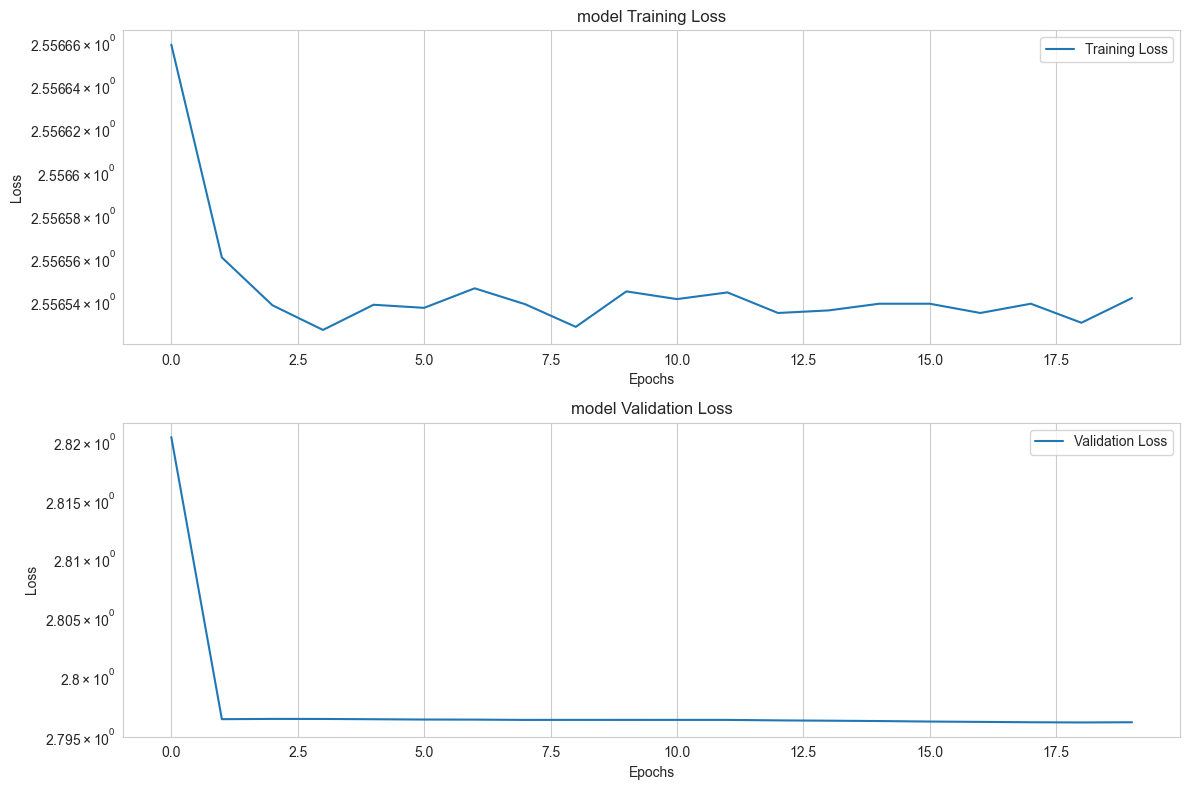

In [54]:
plot_loss(history, 'model')

In [55]:
y_pred_lstm = model.predict(test_gen, steps=test_steps)

70998/70998 [==============================] - 370s 5ms/step


In [56]:
actual_test_target = test_target[window_size:window_size + y_pred_lstm.shape[0]]

In [57]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(actual_test_target, y_pred_lstm)
print(f"Mean Absolute Error on Test Data: {mae}")

Mean Absolute Error on Test Data: 2.497757951568557


In [58]:
# Calculate the absolute errors
abs_error = np.abs(y_pred_lstm.flatten() - actual_test_target)

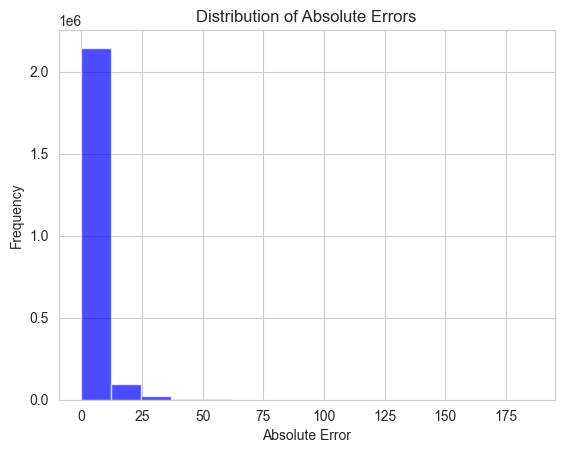

In [59]:
plt.hist(abs_error, bins=15, color='blue', alpha=0.7)
plt.title('Distribution of Absolute Errors')
plt.xlabel('Absolute Error')
plt.ylabel('Frequency')
plt.show()

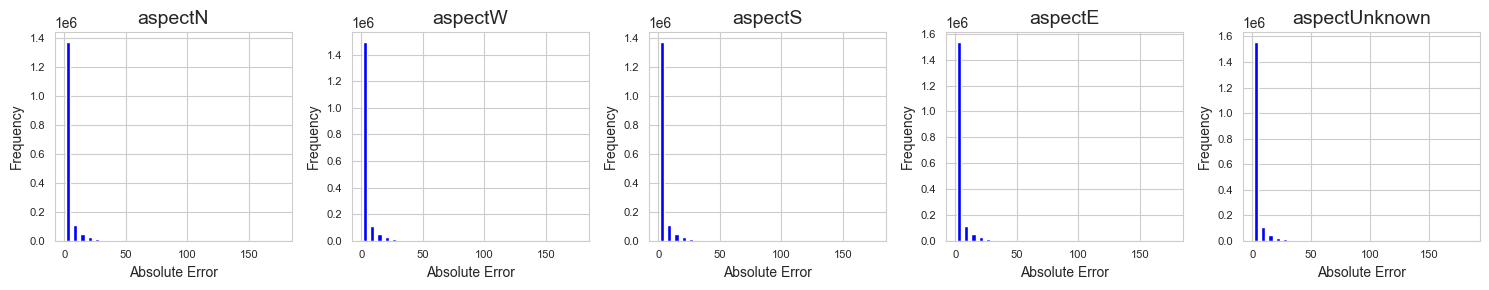

In [61]:
absolute_errors = np.abs(y_pred_lstm.flatten() - actual_test_target)

region_columns = ['aspectN', 'aspectW', 'aspectS', 'aspectE', 'aspectUnknown']
threshold = 0.1

fig, axes = plt.subplots(nrows=1, ncols=len(region_columns), figsize=(15, 3))
axes = axes.flatten()

aligned_test_df = test.iloc[window_size:window_size + y_pred_lstm.shape[0]]

for i, region in enumerate(region_columns):
    idx = aligned_test_df[region] > threshold

    region_abs_errors = absolute_errors[idx.values] 

    if idx.sum() == 0 or np.isnan(region_abs_errors).all():
        axes[i].set_title(f"{region} - No Data", fontsize=14)
        continue

    axes[i].hist(region_abs_errors, bins=30, histtype="barstacked", color="blue", rwidth=0.6, edgecolor="white")
    axes[i].set_title(f"{region}", fontsize=14)
    axes[i].set_xlabel("Absolute Error", fontsize=10)
    axes[i].set_ylabel("Frequency", fontsize=10)
    axes[i].tick_params(axis='both', which='major', labelsize=8)

plt.tight_layout()
plt.show()

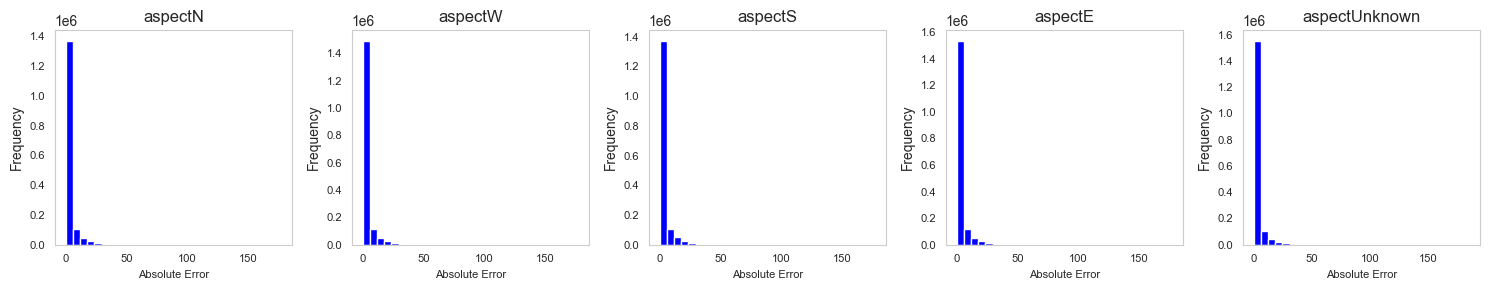

In [64]:
region_columns = ['aspectN', 'aspectW', 'aspectS', 'aspectE', 'aspectUnknown']
threshold = 0.1

fig, axes = plt.subplots(nrows=1, ncols=len(region_columns), figsize=(15, 3))
axes = axes.flatten()

aligned_test_df = test.iloc[window_size:window_size + y_pred_lstm.shape[0]]

for i, region in enumerate(region_columns):
    idx = aligned_test_df[region] > threshold

    region_abs_errors = absolute_errors[idx.values] 

    if idx.sum() == 0 or np.isnan(region_abs_errors).all():
        axes[i].set_title(f"{region} - No Data", fontsize=14)
        axes[i].grid(False)
        continue

    axes[i].hist(region_abs_errors,bins=30, histtype="barstacked", color="blue", edgecolor="white")
    axes[i].set_title(f"{region}", fontsize=12)
    axes[i].set_xlabel("Absolute Error", fontsize=8)
    axes[i].set_ylabel("Frequency", fontsize=10)
    axes[i].tick_params(axis='both', which='major', labelsize=8)
    axes[i].grid(False)

plt.tight_layout()
plt.show()